In [1]:
#library we will use in the code
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,Activation, MaxPool2D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.applications import inception_v3

In [2]:
#the class names taken from the data defination
class_names=['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', 
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

when we use tf.keras.utils.image_dataset_from_directory() to read our data from training folder or test folder it will open the folder and it will sort the folder 0 and 1 and 10 and 100 which is wrong because it will give index(label) to them so for example folder 10 will get index 3 which is misleading because the index (label)for class 10 should be 10 as representing its type and categories so to avoid that the best solution is to name each class for its actual name as given in the data definition so we will avoid this misleading so the folder 0 will be pink primrose and for all the class we will do the same ,after that all the folder will be sorted in the directory so when we open the folder we will find alpine sea holly as the first class so the tf.kares will labeled it as 0 so when we take class_name[0] to check for the accuracy of it it must be also sorted that’s why we also sort the class_names list .

In [ ]:
#here we change the name for classes in train folder
for i in range(len(class_names)):
  x=i
  inde=str(x)
  old_name = r"C:/Users/DELL G3/Desktop/neural network/project 2/Data/train/"+inde
  inde=str(class_names[i])
  new_name = r"C:/Users/DELL G3/Desktop/neural network/project 2/Data/train/"+inde
  os.rename(old_name, new_name)

In [ ]:
#here we change the name for classes in test folder
for i in range(len(class_names)):
  x=i
  inde=str(x)
  old_name = r"C:/Users/DELL G3/Desktop/neural network/project 2/Data/test/"+inde
  inde=str(class_names[i])
  new_name = r"C:/Users/DELL G3/Desktop/neural network/project 2/Data/test/"+inde
  os.rename(old_name, new_name)

In [3]:
#here we sort the class_names list
list.sort(class_names)

In [4]:
#here we are counting the number os samples in each class we used listdir because its so much faster
for i in range(len(class_names)):
    inde=str(class_names[i])
    s=r"C:/Users/DELL G3/Desktop/neural network/project 2/Data/train/"+inde
    k=os.listdir(s)
    k=len(k)
    print(class_names[i],"has ", k,"images in it")

alpine sea holly has  18 images in it
anthurium has  118 images in it
artichoke has  119 images in it
azalea has  137 images in it
balloon flower has  90 images in it
barberton daisy has  64 images in it
bee balm has  111 images in it
bird of paradise has  105 images in it
bishop of llandaff has  58 images in it
black-eyed susan has  93 images in it
blackberry lily has  25 images in it
blanket flower has  24 images in it
bolero deep blue has  18 images in it
bougainvillea has  131 images in it
bromelia has  34 images in it
buttercup has  261 images in it
californian poppy has  55 images in it
camellia has  127 images in it
canna lily has  46 images in it
canterbury bells has  20 images in it
cape flower has  57 images in it
carnation has  105 images in it
cautleya spicata has  27 images in it
clematis has  101 images in it
colt's foot has  43 images in it
columbine has  112 images in it
common dandelion has  563 images in it
common tulip has  390 images in it
corn poppy has  83 images 

In [9]:
#here we read our data and take 128 batch size and make each image of the shape 224x224 and assign for each class a index(label)
training_set = tf.keras.utils.image_dataset_from_directory("C:/Users/DELL G3/Desktop/neural network/project 2/Data/train",
                                                   color_mode='rgb',
                                                   batch_size=128,
                                                   image_size=(224, 224))

Found 12753 files belonging to 104 classes.


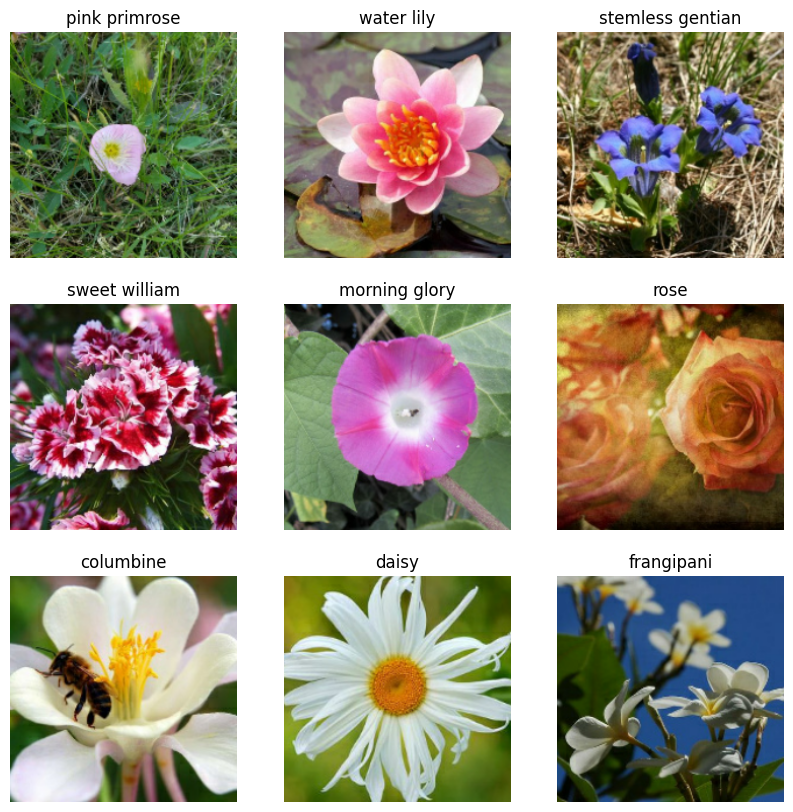

In [9]:
#here we plot some samples from each class
#here we can more understand the purpose of sorting the class_names
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [10]:
#here we scale the pixles of each image so our run will be much faster
training_set =training_set.map(lambda x,y: (x/255, y))

In [11]:
training_set.as_numpy_iterator().next()

(array([[[[0.07058824, 0.15294118, 0.        ],
          [0.06442577, 0.1467787 , 0.        ],
          [0.06778711, 0.14257704, 0.        ],
          ...,
          [0.28123254, 0.38711488, 0.01176471],
          [0.28627452, 0.39215687, 0.01176471],
          [0.28627452, 0.39215687, 0.01176471]],
 
         [[0.07058824, 0.16834733, 0.        ],
          [0.07168868, 0.16218486, 0.        ],
          [0.07306922, 0.159964  , 0.        ],
          ...,
          [0.29025608, 0.39217687, 0.0188075 ],
          [0.28737488, 0.39325723, 0.01286507],
          [0.28011206, 0.3859944 , 0.00560224]],
 
         [[0.07310924, 0.18515407, 0.        ],
          [0.07817127, 0.18295318, 0.        ],
          [0.08117247, 0.1839736 , 0.00162065],
          ...,
          [0.3002801 , 0.40094036, 0.02595038],
          [0.29307702, 0.39499784, 0.02162848],
          [0.27591035, 0.3817927 , 0.00644258]],
 
         ...,
 
         [[0.29467773, 0.4123248 , 0.20336124],
          [0.31426

In [8]:
#now we will take 90 percent for train and 10 percent for validation
train_size = int(len(training_set)*.9)
val_size = int(len(training_set)*.1)
train = training_set.take(train_size)
val = training_set.skip(train_size).take(val_size)

In [6]:
#here we read our test data and take 128 batch size and make each image of the shape 224x224 and assign for each class a index(label)
test_set = tf.keras.utils.image_dataset_from_directory("C:/Users/DELL G3/Desktop/neural network/project 2/Data/test",
                                                   color_mode='rgb',
                                                   batch_size=128,
                                                   image_size=(224, 224))

Found 3712 files belonging to 104 classes.


In [7]:
#here we scale the pixles of each image so our run will be much faster
test_set=test_set.map(lambda x,y: (x/255, y))


In [8]:
test_set.as_numpy_iterator().next()

(array([[[[0.19607843, 0.2509804 , 0.18431373],
          [0.19915967, 0.2540616 , 0.18739495],
          [0.20252101, 0.25994396, 0.1882353 ],
          ...,
          [0.27983195, 0.32689077, 0.2719888 ],
          [0.28235295, 0.32941177, 0.27450982],
          [0.28235295, 0.32941177, 0.27450982]],
 
         [[0.19915967, 0.25714284, 0.18431373],
          [0.20466188, 0.26264504, 0.18497398],
          [0.21066426, 0.26918766, 0.18911564],
          ...,
          [0.27366948, 0.32072833, 0.26802725],
          [0.27685076, 0.32390958, 0.2751701 ],
          [0.27927172, 0.32633054, 0.27759102]],
 
         [[0.2       , 0.25882354, 0.17927171],
          [0.20418167, 0.2630052 , 0.1812525 ],
          [0.2119848 , 0.26756704, 0.18683474],
          ...,
          [0.2719888 , 0.31904763, 0.2701881 ],
          [0.27589044, 0.32186875, 0.27535018],
          [0.2809524 , 0.32296917, 0.2784314 ]],
 
         ...,
 
         [[0.39019597, 0.5064424 , 0.06162445],
          [0.39239

In [9]:
model = Sequential()#here we create our model

In [10]:
#now we will add the layers to the modle
model.add(Conv2D(16, (7,7), 1, activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (3,3), 1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(32, (1,1), 1, activation=None))#this is one of the most important layer because it allow us to go deeper in the net because it decrese the number of parameters
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(32, (1,1), 1, activation=None))
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(32, (1,1), 1, activation=None))
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten())
model.add(Dense(244, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(104, activation=tf.keras.activations.softmax))

In [11]:
#we will use adam optimizer
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#as we can see our model have 1,238,116 trainable parameters 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      2368      
                                                                 
 batch_normalization (BatchN  (None, 218, 218, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      9280      
                                                                 
 batch_normalization_1 (Batc  (None, 107, 107, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
logdir='C:/Users/DELL G3/Desktop/neural network/project 2/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
#here we will train our modle for 10 epochs
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
90/90 [==============================] - 539s 6s/step - loss: 3.3581 - accuracy: 0.2135 - val_loss: 5.5689 - val_accuracy: 0.0414
Epoch 2/10
90/90 [==============================] - 693s 8s/step - loss: 2.5609 - accuracy: 0.3536 - val_loss: 5.7142 - val_accuracy: 0.0397
Epoch 3/10
90/90 [==============================] - 667s 7s/step - loss: 2.0985 - accuracy: 0.4550 - val_loss: 4.9391 - val_accuracy: 0.0608
Epoch 4/10
90/90 [==============================] - 731s 8s/step - loss: 1.6284 - accuracy: 0.5699 - val_loss: 3.9453 - val_accuracy: 0.1290
Epoch 5/10
90/90 [==============================] - 741s 8s/step - loss: 1.1792 - accuracy: 0.6860 - val_loss: 2.2486 - val_accuracy: 0.4307
Epoch 6/10
90/90 [==============================] - 708s 8s/step - loss: 0.7434 - accuracy: 0.8218 - val_loss: 1.6663 - val_accuracy: 0.5880
Epoch 7/10
90/90 [==============================] - 739s 8s/step - loss: 0.3827 - accuracy: 0.9228 - val_loss: 1.1270 - val_accuracy: 0.7388
Epoch 8/10
90

In [15]:
#here we will train our modle for another 10 epochs
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
90/90 [==============================] - 697s 8s/step - loss: 0.1476 - accuracy: 0.9749 - val_loss: 0.2231 - val_accuracy: 0.9432
Epoch 2/10
90/90 [==============================] - 681s 8s/step - loss: 0.0570 - accuracy: 0.9951 - val_loss: 0.0687 - val_accuracy: 0.9919
Epoch 3/10
90/90 [==============================] - 686s 8s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9927
Epoch 4/10
90/90 [==============================] - 580s 6s/step - loss: 0.0068 - accuracy: 0.9999 - val_loss: 0.0344 - val_accuracy: 0.9943
Epoch 5/10
90/90 [==============================] - 530s 6s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9951
Epoch 6/10
90/90 [==============================] - 538s 6s/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0350 - val_accuracy: 0.9951
Epoch 7/10
90/90 [==============================] - 533s 6s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9935
Epoch 8/10
90

In [19]:
#here we save our model in project2 folder and named it my_archicture so we can use it later for evaluation
model.save(os.path.join('C:/Users/DELL G3/Desktop/neural network/project 2','my_archticture.h5'))

In [23]:
#here we will evaluate the our model on test data
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print('\nTest accuracy:', test_acc)

29/29 - 42s - loss: 2.3442 - accuracy: 0.5013 - 42s/epoch - 1s/step

Test accuracy: 0.501347005367279


In [17]:
#here we will use the googlenet architecture
base_model =tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

In [18]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [19]:
#here we will make all the layers non-trainable so we able to do transfer learning
for layer in base_model.layers:
    layer.trainable = False

In [20]:
#as we can see theres is no trainable parameters
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [21]:
#here we create our model and put all the layers of googlenet in it
model2 = Sequential([base_model])

In [22]:
#here we will add the last layer which is softmax of 104 perceptron 
model2.add(Flatten())
model2.add(Dense(104, activation=tf.keras.activations.softmax))

In [23]:
model2.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
logdir='C:/Users/DELL G3/Desktop/neural network/project 2/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
#here we will train our model for 5 epoches
hist2 = model2.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
90/90 [==============================] - 430s 5s/step - loss: 10.1341 - accuracy: 0.4145 - val_loss: 2.7417 - val_accuracy: 0.6650
Epoch 2/5
90/90 [==============================] - 427s 5s/step - loss: 1.2794 - accuracy: 0.7933 - val_loss: 1.7181 - val_accuracy: 0.7616
Epoch 3/5
90/90 [==============================] - 448s 5s/step - loss: 0.6525 - accuracy: 0.8793 - val_loss: 1.4932 - val_accuracy: 0.8094
Epoch 4/5
90/90 [==============================] - 459s 5s/step - loss: 0.4747 - accuracy: 0.9089 - val_loss: 1.3474 - val_accuracy: 0.8418
Epoch 5/5
90/90 [==============================] - 454s 5s/step - loss: 0.3694 - accuracy: 0.9290 - val_loss: 1.3080 - val_accuracy: 0.8629


In [31]:
#here we will train our model for another 5 epoches
hist2 = model2.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
90/90 [==============================] - 427s 5s/step - loss: 0.2521 - accuracy: 0.9633 - val_loss: 1.9643 - val_accuracy: 0.8816
Epoch 2/5
90/90 [==============================] - 458s 5s/step - loss: 0.2538 - accuracy: 0.9648 - val_loss: 1.6732 - val_accuracy: 0.9011
Epoch 3/5
90/90 [==============================] - 450s 5s/step - loss: 0.1574 - accuracy: 0.9766 - val_loss: 1.6883 - val_accuracy: 0.8962
Epoch 4/5
90/90 [==============================] - 467s 5s/step - loss: 0.2060 - accuracy: 0.9744 - val_loss: 1.4784 - val_accuracy: 0.9043
Epoch 5/5
90/90 [==============================] - 470s 5s/step - loss: 0.2449 - accuracy: 0.9698 - val_loss: 1.5347 - val_accuracy: 0.9035


In [ ]:
#here we will save our googlenet model and named it googlenet so we can use it later for evaluation
model2.save(os.path.join('C:/Users/DELL G3/Desktop/neural network/project 2','googlenet.h5'))

In [7]:
#here we will use the resnet architecture
pretrained_model= tf.keras.applications.ResNet50(include_top=False,input_shape=(224,224,3),pooling='max',weights='imagenet')

In [8]:
#here we make all the layers non-trainable
for layer in pretrained_model.layers:
        layer.trainable=False
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [31]:
#here we create our model for resnet 
model3= Sequential([pretrained_model])
model3.add(Flatten())
model3.model2.add(BatchNormalization())
model3.add(Dense(104, activation=tf.keras.activations.softmax))

In [32]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 104)               213096    
                                                                 
Total params: 23,809,000
Trainable params: 217,192
Non-trainable params: 23,591,808
_________________________________________________________________


In [33]:
model3.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
logdir='C:/Users/DELL G3/Desktop/neural network/project 2/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
#here we will train our model for 10 epoches
hist3 = model3.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
90/90 [==============================] - 726s 8s/step - loss: 3.9752 - accuracy: 0.1245 - val_loss: 4.8533 - val_accuracy: 0.0616
Epoch 2/10
90/90 [==============================] - 700s 8s/step - loss: 3.2100 - accuracy: 0.2253 - val_loss: 3.8472 - val_accuracy: 0.1046
Epoch 3/10
90/90 [==============================] - 698s 8s/step - loss: 2.8785 - accuracy: 0.2953 - val_loss: 3.2676 - val_accuracy: 0.2019
Epoch 4/10
90/90 [==============================] - 697s 8s/step - loss: 2.6504 - accuracy: 0.3405 - val_loss: 3.0246 - val_accuracy: 0.2620
Epoch 5/10
90/90 [==============================] - 702s 8s/step - loss: 2.4725 - accuracy: 0.3836 - val_loss: 2.8242 - val_accuracy: 0.3212
Epoch 6/10
90/90 [==============================] - 703s 8s/step - loss: 2.3224 - accuracy: 0.4194 - val_loss: 2.7037 - val_accuracy: 0.3479
Epoch 7/10
90/90 [==============================] - 705s 8s/step - loss: 2.1931 - accuracy: 0.4458 - val_loss: 2.6037 - val_accuracy: 0.3909
Epoch 8/10
90

In [43]:
#here we saved the model
model3.save(os.path.join('C:/Users/DELL G3/Desktop/neural network/project 2','resnet_model.h5'))

In [ ]:
#here we load the model to make more epoches
model3 = load_model('C:/Users/DELL G3/Desktop/neural network\project 2/resnet_model.h5')

In [17]:
#here we will train our model for another 10 epoches
hist3=model3.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
90/90 [==============================] - 727s 8s/step - loss: 1.4357 - accuracy: 0.6339 - val_loss: 1.5166 - val_accuracy: 0.6318
Epoch 2/10
90/90 [==============================] - 685s 8s/step - loss: 1.3883 - accuracy: 0.6429 - val_loss: 1.5392 - val_accuracy: 0.6172
Epoch 3/10
90/90 [==============================] - 689s 8s/step - loss: 1.3384 - accuracy: 0.6561 - val_loss: 1.5734 - val_accuracy: 0.6115
Epoch 4/10
90/90 [==============================] - 944s 10s/step - loss: 1.3133 - accuracy: 0.6658 - val_loss: 1.5787 - val_accuracy: 0.5848
Epoch 5/10
90/90 [==============================] - 822s 9s/step - loss: 1.2709 - accuracy: 0.6753 - val_loss: 1.5691 - val_accuracy: 0.6010
Epoch 6/10
90/90 [==============================] - 915s 10s/step - loss: 1.2490 - accuracy: 0.6767 - val_loss: 1.5543 - val_accuracy: 0.5985
Epoch 7/10
90/90 [==============================] - 774s 9s/step - loss: 1.2148 - accuracy: 0.6866 - val_loss: 1.6038 - val_accuracy: 0.6099
Epoch 8/10


In [ ]:
model3.save(os.path.join('C:/Users/DELL G3/Desktop/neural network/project 2','resnet_model.h5'))

In [18]:
#here we evaluate ou resnet model on test data
test_loss, test_acc = model3.evaluate(test_set)

print('\nTest accuracy:', test_acc)

29/29 [==============================] - 338s 11s/step - loss: 4.0345 - accuracy: 0.2581

Test accuracy: 0.2580818831920624


In [12]:
#here we are creating our ensambled model
my_archticture = load_model('C:/Users/DELL G3/Desktop/neural network/project 2/my_archticture.h5')
my_archticture= Model(inputs=my_archticture.inputs,outputs=my_archticture.outputs,name='name_of_model_1')

googlenet = load_model('C:/Users/DELL G3/Desktop/neural network/project 2/googlenet.h5')
googlenet= Model(inputs=googlenet.inputs,outputs=googlenet.outputs,name='name_of_model_2')

resnet = load_model('C:/Users/DELL G3/Desktop/neural network/project 2/resnet_model.h5')
resnet = Model(inputs=resnet.inputs,outputs=resnet.outputs,name='name_of_model_3')

models = [my_archticture, googlenet,resnet]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [13]:
ensemble_model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_loss, train_acc = ensemble_model.evaluate(training_set, verbose=2)

print('\nTrain accuracy:', train_acc)

100/100 - 1149s - loss: 0.2319 - accuracy: 0.9989 - 1149s/epoch - 11s/step

Train accuracy: 0.9989022016525269


In [15]:
test_loss, test_acc = ensemble_model.evaluate(test_set, verbose=2)

print('\nTest accuracy:', test_acc)

29/29 - 322s - loss: 1.6076 - accuracy: 0.6748 - 322s/epoch - 11s/step

Test accuracy: 0.6748383641242981


as we can see the ensamble model incresed the accuracy.

In [16]:
#here we are saving it for later use 
ensemble_model.save(os.path.join('C:/Users/DELL G3/Desktop/neural network/project 2','ensamble_model.h5'))

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='accuracy')
plt.plot(hist2.history['val_loss'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
fig = plt.figure()
plt.plot(hist3.history['loss'], color='teal', label='accuracy')
plt.plot(hist3.history['val_loss'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()